###about dataset


**Sales Prediction for Big Mart Outlets:**
  > The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

**Data Dictionary:**

We have a train (8523) and test (5681) data set, the train data set has both input and output variable(s).

**Variable Description:**

Item_Identifier ---- Unique product ID

Item_Weight ---- Weight of product

Item_Fat_Content ---- Whether the product is low fat or not

Item_Visibility ---- The % of the total display area of all products in a store
allocated to the particular product

Item_Type ---- The category to which the product belongs

Item_MRP ---- Maximum Retail Price (list price) of the product

Outlet_Identifier ---- Unique store ID

Outlet_Establishment_Year ---- The year in which the store was established

Outlet_Size ---- The size of the store in terms of ground area covered

Outlet_Location_Type ---- The type of city in which the store is located

Outlet_Type ---- Whether the outlet is just a grocery store or some sort of
supermarket

Item_Outlet_Sales ---- sales of the product in a particular store. This is the
outcome variable to be predicted.




###Data preparation

In [2]:
!gdown --id 1ElnJwwfM2360mu2nhvPvO74bHHgi0yvb #train data

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ElnJwwfM2360mu2nhvPvO74bHHgi0yvb
To: /content/BigMart sales data Train.csv
100% 870k/870k [00:00<00:00, 108MB/s]


In [3]:
#import libraries
import pandas as pd

import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, learning_curve

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#creat a dataframe
data = pd.read_csv("/content/BigMart sales data Train.csv")

###EDA

In [5]:
data.shape

(8523, 12)

In [6]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
from typing import Literal
data.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
data.select_dtypes(include='object').nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

###data visualization

In [4]:
sns.set()
from warnings import filterwarnings
filterwarnings('ignore')

**distribution plot**

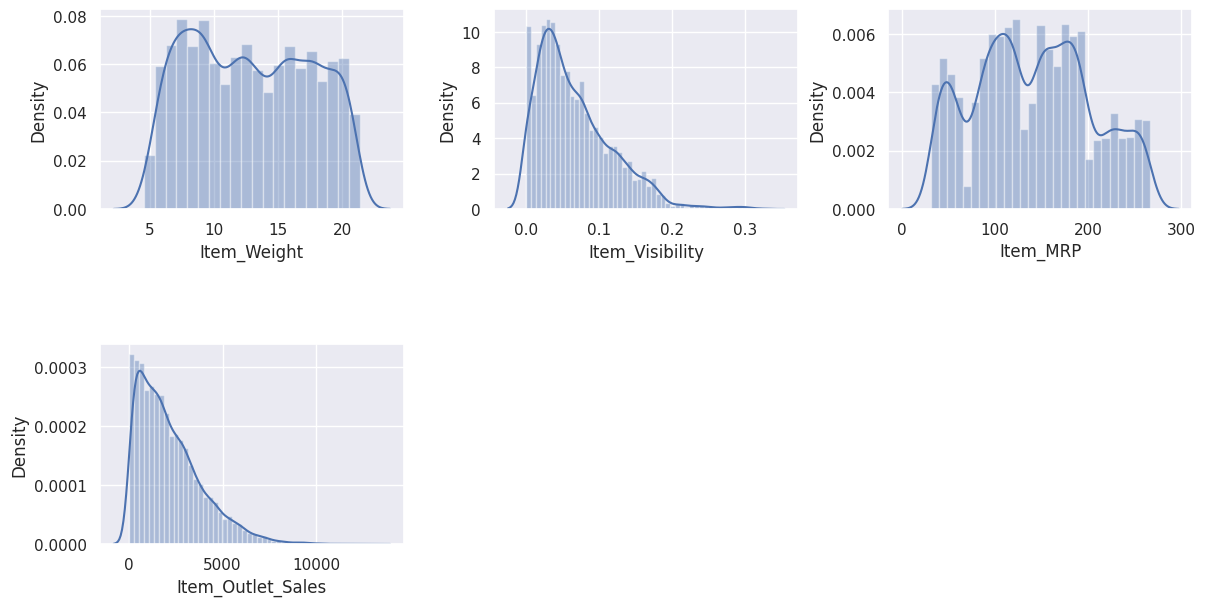

In [5]:
plt.figure(figsize=(12, 6))

plt.subplot(2,3,1)
sns.distplot(data['Item_Weight'])

plt.subplot(2,3,2)
sns.distplot(data['Item_Visibility'])

plt.subplot(2,3,3)
sns.distplot(data['Item_MRP'])

plt.subplot(2,3,4)
sns.distplot(data['Item_Outlet_Sales'])

plt.tight_layout(pad=0.4, w_pad=0.6, h_pad=5.0)

**count plot**

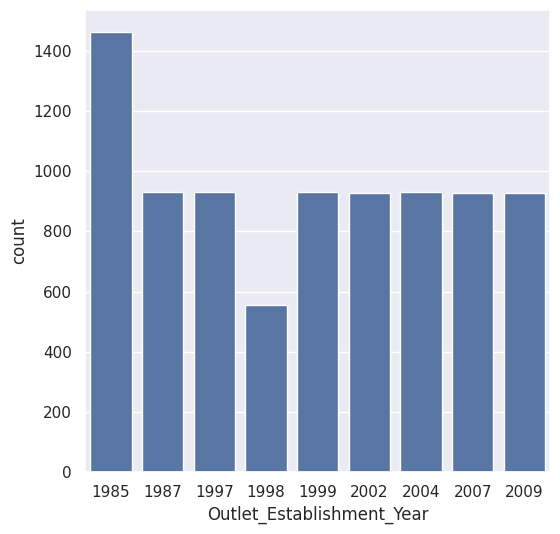

In [6]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Outlet_Establishment_Year', data=data)
plt.show()

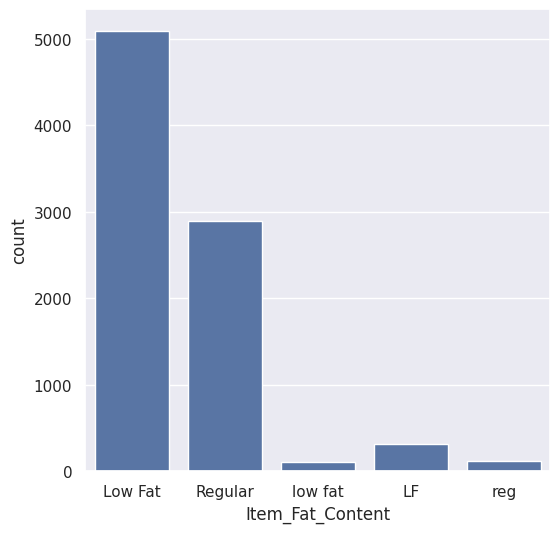

In [7]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Item_Fat_Content', data=data)
plt.show()

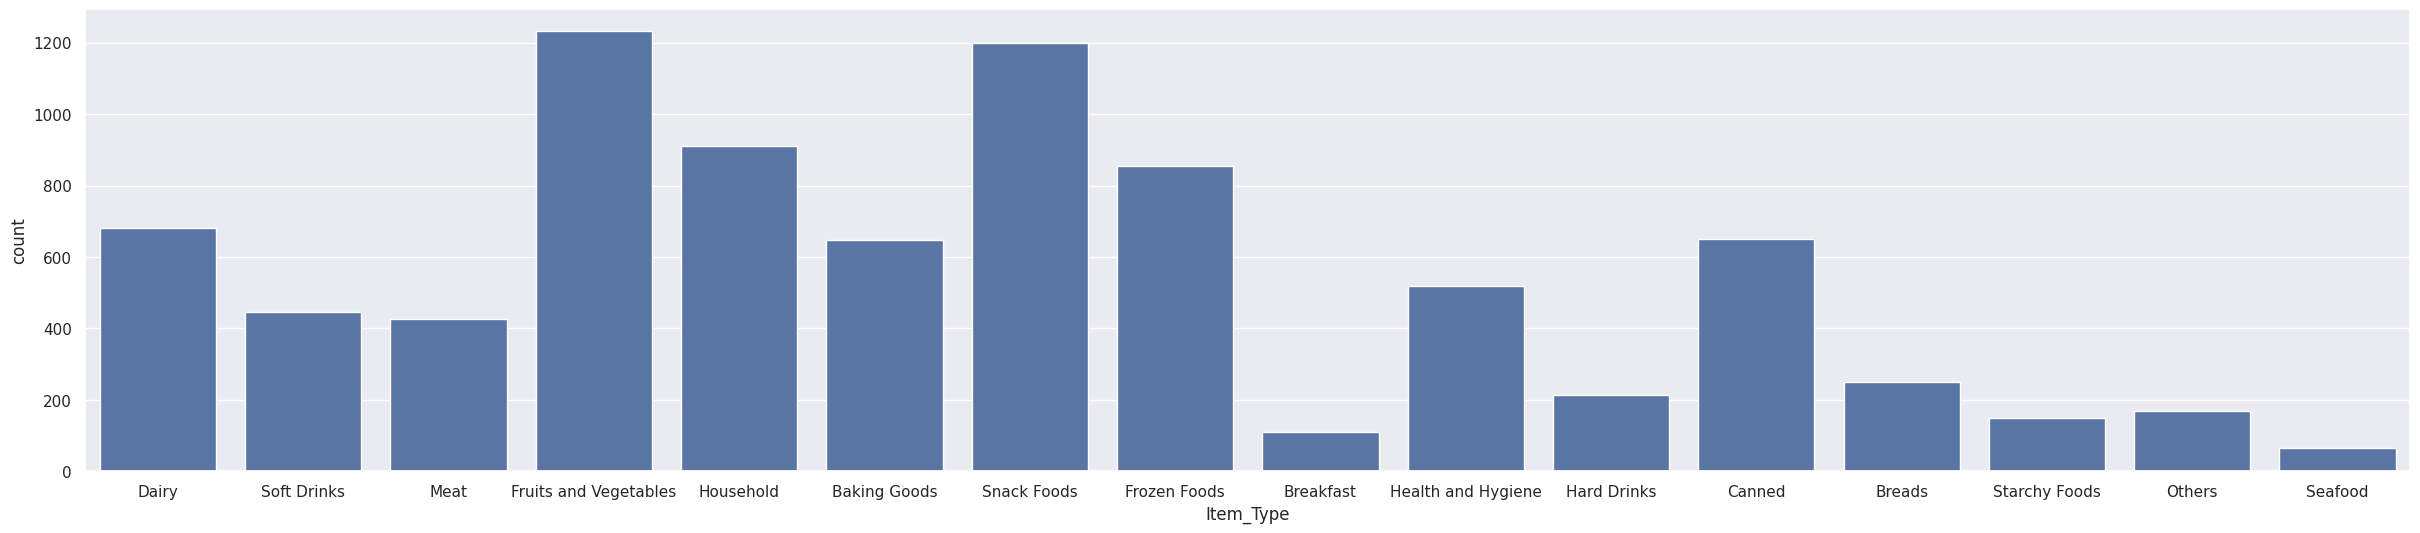

In [8]:
plt.figure(figsize=(30, 6))
sns.countplot(x='Item_Type', data=data)
plt.show()

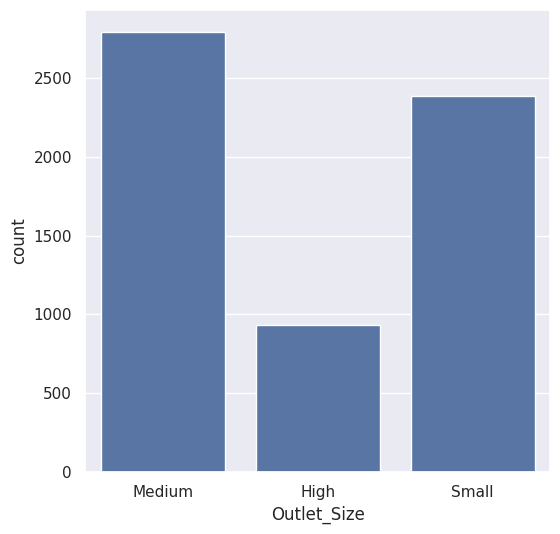

In [9]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Outlet_Size', data=data)
plt.show()

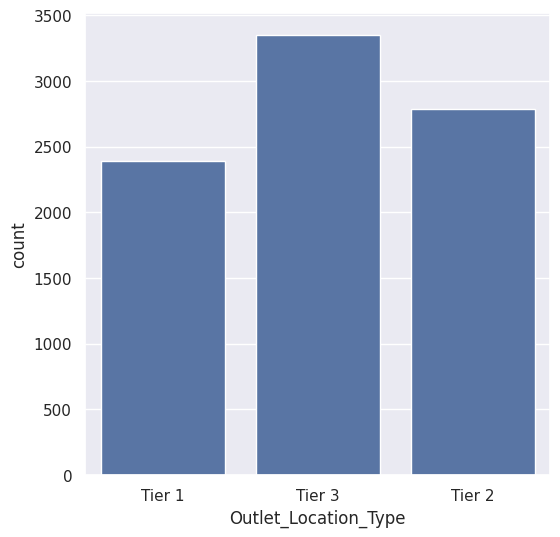

In [10]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Outlet_Location_Type', data=data)
plt.show()

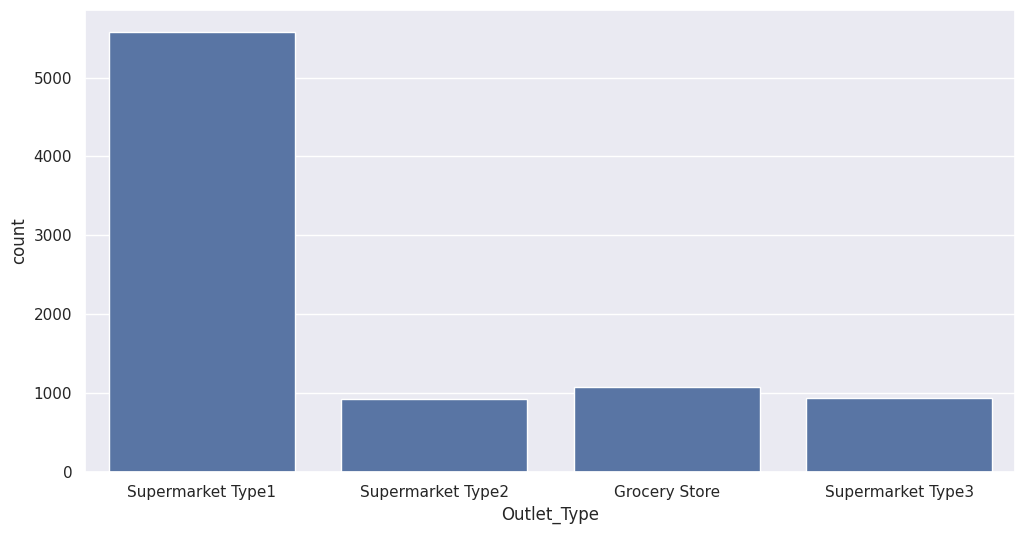

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Outlet_Type', data=data)
plt.show()

**box plot**

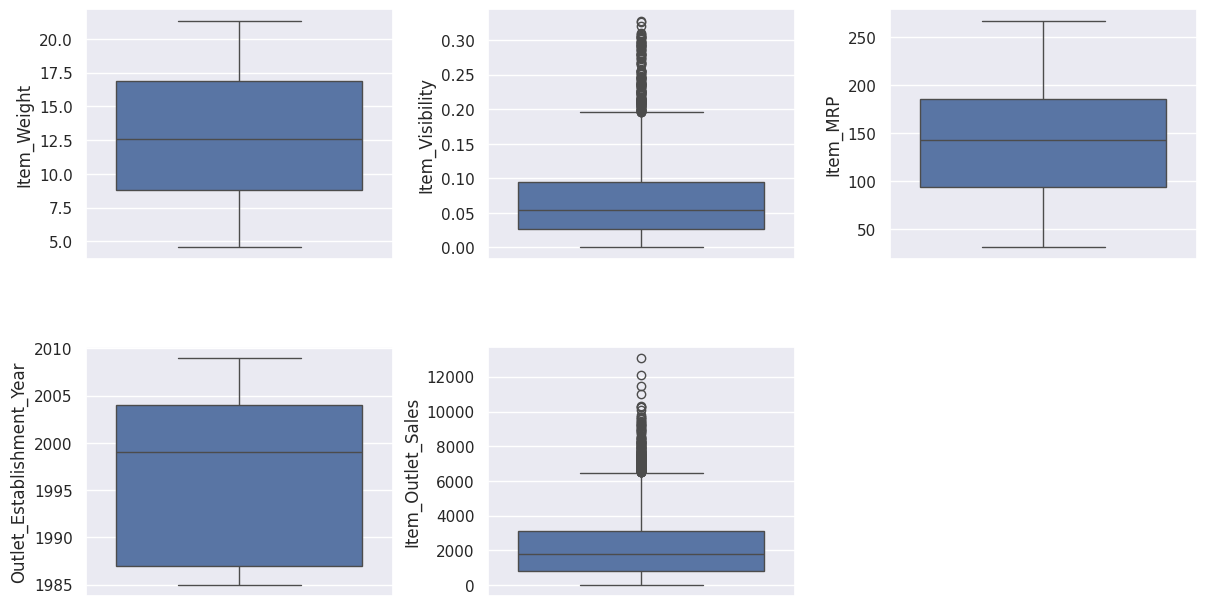

In [12]:
plt.figure(figsize=(12,6))

plt.subplot(2,3,1)
sns.boxplot(data['Item_Weight'])

plt.subplot(2,3,2)
sns.boxplot(data['Item_Visibility'])

plt.subplot(2,3,3)
sns.boxplot(data['Item_MRP'])

plt.subplot(2,3,4)
sns.boxplot(data['Outlet_Establishment_Year'])

plt.subplot(2,3,5)
sns.boxplot(data['Item_Outlet_Sales'])

plt.tight_layout(pad=0.4, w_pad=0.6, h_pad=5.0)

In [13]:
num_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
for i in num_cols:
  q1 = data[i].quantile(0.25)
  q3 = data[i].quantile(0.75)
  iqr = q3 - q1
  v_col = data[(data[i] <= q1 - 1.5 * iqr) | (data[i] >= q3 + 1.5 * iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
  print("Column %s outliers = %.2f%%" % (i, perc))

Column Item_Weight outliers = 0.00%
Column Item_Visibility outliers = 1.69%
Column Item_MRP outliers = 0.00%
Column Outlet_Establishment_Year outliers = 0.00%
Column Item_Outlet_Sales outliers = 2.18%


**heat map**

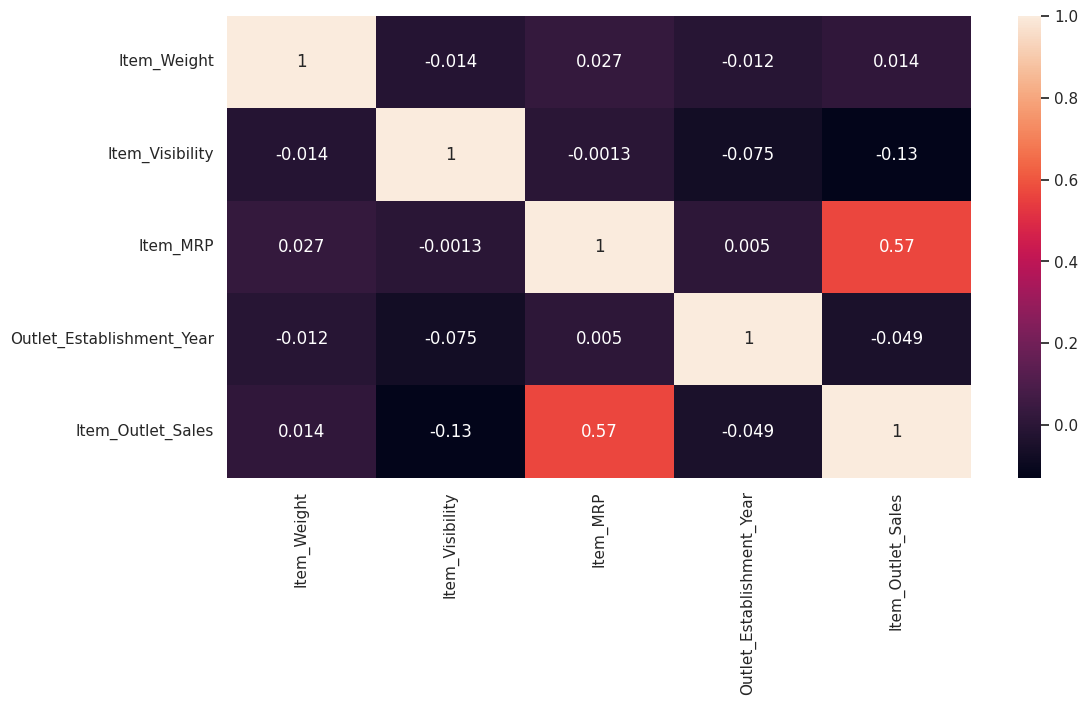

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(data[num_cols].corr(), annot=True)
plt.show()

###preprocessing

In [12]:
data.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [13]:
#handle repetitive values in 'Item_Fat_Content' column
data = data.replace({'Item_Fat_Content': {'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}})

In [14]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [15]:
#handling missing values
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())

data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

In [16]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
#drop unimportant columns
data_train = data.drop(labels=['Item_Identifier', 'Outlet_Identifier'], axis=1)

In [18]:
data_train.shape

(8523, 10)

In [19]:
y = data_train.Item_Outlet_Sales

In [20]:
X = data_train.iloc[:, :-1]

In [21]:
X.shape

(8523, 9)

In [22]:
X = pd.get_dummies(X)

In [23]:
X

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,True,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.920,0.019278,48.2692,2009,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.500,0.016760,141.6180,1999,True,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.200,0.000000,182.0950,1998,False,True,False,False,False,False,...,False,True,False,False,False,True,True,False,False,False
4,8.930,0.000000,53.8614,1987,True,False,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,True,False,False,False,False,False,...,True,False,False,False,False,True,False,True,False,False
8519,8.380,0.046982,108.1570,2002,False,True,True,False,False,False,...,False,True,False,False,True,False,False,True,False,False
8520,10.600,0.035186,85.1224,2004,True,False,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False
8521,7.210,0.145221,103.1332,2009,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [24]:
# Create the scaler
scaler = MinMaxScaler()

# Rescale the column
X = scaler.fit_transform(X)

In [25]:
X

array([[0.28252456, 0.04886645, 0.92750715, ..., 1.        , 0.        ,
        0.        ],
       [0.08127419, 0.05870508, 0.0720684 , ..., 0.        , 1.        ,
        0.        ],
       [0.77076511, 0.05103696, 0.46828841, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.35992855, 0.10714751, 0.22849221, ..., 1.        , 0.        ,
        0.        ],
       [0.15808276, 0.44221878, 0.30493925, ..., 0.        , 1.        ,
        0.        ],
       [0.61000298, 0.13666114, 0.18750976, ..., 1.        , 0.        ,
        0.        ]])

###training

In [28]:
#splitting data to train and test set
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=42)

**decision tree**

In [ ]:
#hyperparameters tuning for decision tree
model1 = DecisionTreeRegressor(random_state=42)
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model1, param_grid=param_grid, cv=5)
grid_search.fit(train_X, train_y)
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [26]:
best_params = {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [29]:
#train the decision tree model
dt = DecisionTreeRegressor(random_state=42,**best_params)
dt.fit(train_X, train_y)
y_pred = dt.predict(val_X)

#evaluating
dt_rmse = np.sqrt(mean_squared_error(val_y, y_pred))
dt_r2 = r2_score(val_y, y_pred)

**Random forest**

In [ ]:
#hyperparameters tuning for random forest
model2 = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}
grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=5,)
grid_search.fit(train_X, train_y)
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}


In [30]:
best_params = {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}

In [31]:
#train the random forest model
rf = RandomForestRegressor(random_state=42, **best_params)
rf.fit(train_X, train_y)
y_pred = rf.predict(val_X)

#evaluating
rf_rmse = np.sqrt(mean_squared_error(val_y, y_pred))
rf_r2 = r2_score(val_y, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


**xgboost**

In [ ]:
#hyperparameters tuning for xgboost
model3 = xgb.XGBRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}
grid_search = GridSearchCV(estimator=model3, param_grid=param_grid, cv=5)
grid_search.fit(train_X, train_y)
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [32]:
best_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [33]:
##train the xgboost model
xgboost_model = xgb.XGBRegressor(**best_params)
xgboost_model.fit(train_X, train_y)
y_pred = xgboost_model.predict(val_X)

#evaluating
xgb_rmse = np.sqrt(mean_squared_error(val_y, y_pred))
xgb_r2 = r2_score(val_y, y_pred)

###results

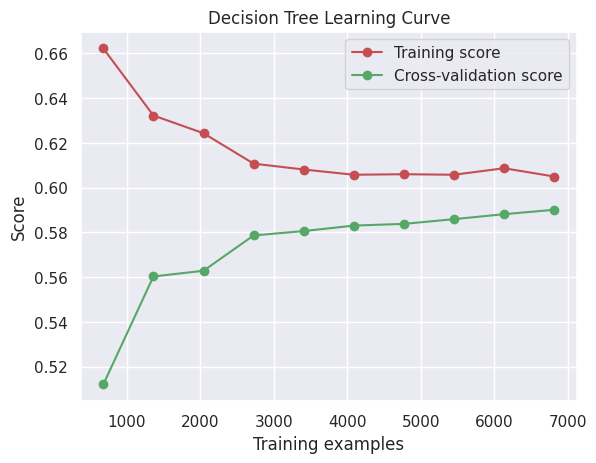

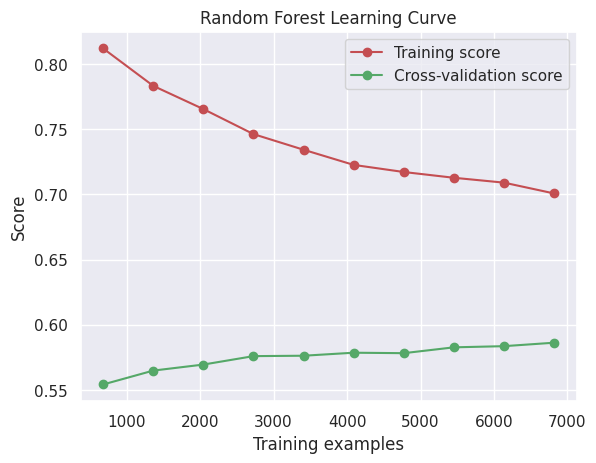

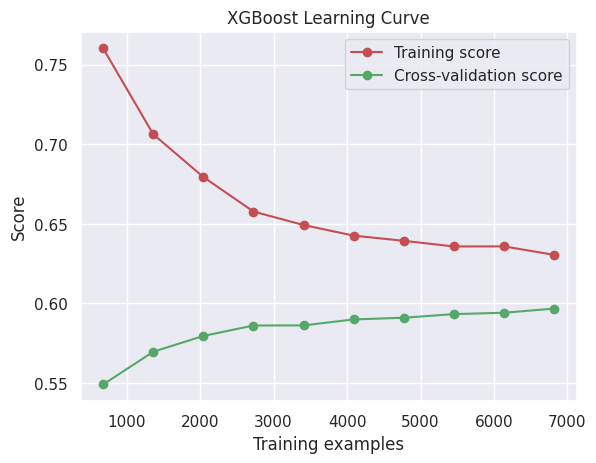

In [57]:
#learning curve for models
models = {"Decision Tree": dt, "Random Forest": rf, "XGBoost": xgboost_model}
for k, v in models.items():
  train_sizes, train_scores, test_scores = learning_curve(v, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
  train_scores_mean = np.mean(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  plt.figure()
  plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
  plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
  plt.xlabel("Training examples")
  plt.ylabel("Score")
  plt.title(f'{k}'" Learning Curve")
  plt.legend(loc="best")
  plt.show()

In [34]:
result = pd.DataFrame({'RMSE':[dt_rmse, rf_rmse, xgb_rmse], 'r2_score':[dt_r2, rf_r2, xgb_r2]}, index=['dt', 'rf', 'xgb'])

In [35]:
result

,RMSE,r2_score
dt,1027.731198,0.611390
rf,1041.107789,0.601208
xgb,1034.400657,0.606329


In [42]:
#compare RMSE and r2_score of different models
x_axis = list(result.index)
y1_axis = list(result.RMSE.values)
y2_axis = list(result.r2_score.values)

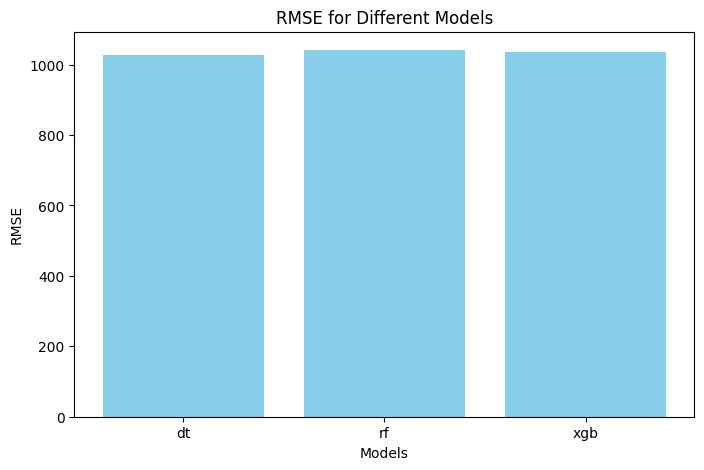

In [45]:
plt.figure(figsize=(8, 5))
plt.bar(x_axis, y1_axis, color='skyblue')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE for Different Models')
plt.show()

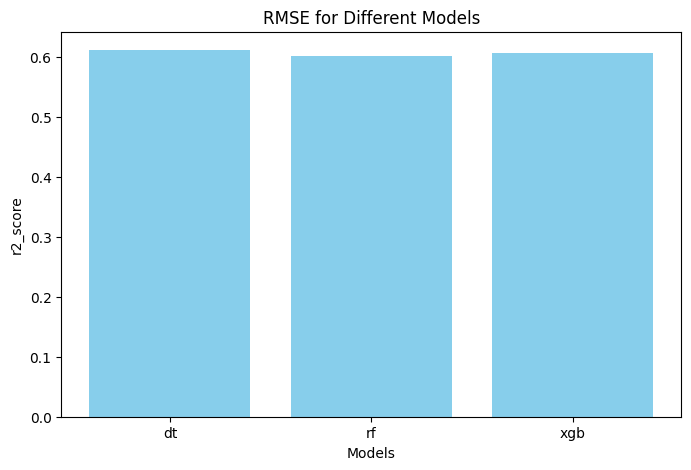

In [46]:
plt.figure(figsize=(8, 5))
plt.bar(x_axis, y2_axis, color='skyblue')
plt.xlabel('Models')
plt.ylabel('r2_score')
plt.title('RMSE for Different Models')
plt.show()